# MENTAL HEALTH IN THE TECH WORKPLACE
### By Ryan Kurz

For the given dataset, it orginally explored the frequency of mental health issues/problems and the attitude towards mental health by the various geographic locations around the world. I will have a similar approach to looking at the data by exploring the different predicators of mental health issues and what might further their illness. Mental Health is an important topic and mental health issues that can happen to anyone whether they know it or not. You can always talk to someone about it and you are never alone. You will never get turned away for your troubles and when you think no one is there for you, just open your eyes to the many kind people in the world that care for you. 

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
import sys
from sklearn.preprocessing import LabelEncoder 
from sklearn.cluster import KMeans


### Reading the dataset in CSV form

In [12]:
filename = "main_survey.csv"
main_df = pd.read_csv(filename)
main_df.head()


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,2014-08-27 11:34:53,46,Male,United States,MD,Yes,Yes,No,Sometimes,1-5,...,Yes,Very easy,No,No,Yes,Yes,No,Yes,Yes,Yes
1,2014-08-27 11:35:08,36,Male,France,NaN,Yes,Yes,No,Never,6-25,...,Yes,Somewhat easy,No,No,Some of them,Some of them,Maybe,Maybe,Don't know,No
2,2014-08-27 11:35:12,29,Male,United States,NY,No,Yes,Yes,Sometimes,100-500,...,No,Somewhat difficult,Maybe,No,Some of them,Some of them,No,No,No,No
3,2014-08-27 11:35:24,31,Male,United States,NC,Yes,No,No,Never,1-5,...,Yes,Somewhat difficult,No,No,Some of them,Some of them,No,Maybe,Yes,No
4,2014-08-27 11:35:48,46,Male,United States,MA,No,No,Yes,Often,26-100,...,Don't know,Don't know,Maybe,No,Some of them,Yes,No,Maybe,No,No


In [13]:
main_df.isnull().sum().sort_values(ascending=False)

state                        496
Timestamp                      0
wellness_program               0
mental_vs_physical             0
phys_health_interview          0
mental_health_interview        0
supervisor                     0
coworkers                      0
phys_health_consequence        0
mental_health_consequence      0
leave                          0
anonymity                      0
seek_help                      0
care_options                   0
Age                            0
benefits                       0
tech_company                   0
remote_work                    0
no_employees                   0
work_interfere                 0
treatment                      0
family_history                 0
self_employed                  0
Country                        0
Gender                         0
obs_consequence                0
dtype: int64

### More clean-up for the dataset

In [14]:
main_df.drop('state',axis=1,inplace=True)
main_df.drop('Timestamp',axis=1,inplace=True)

In [15]:
main_df.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,46,Male,United States,Yes,Yes,No,Sometimes,1-5,Yes,Yes,...,Yes,Very easy,No,No,Yes,Yes,No,Yes,Yes,Yes
1,36,Male,France,Yes,Yes,No,Never,6-25,Yes,Yes,...,Yes,Somewhat easy,No,No,Some of them,Some of them,Maybe,Maybe,Don't know,No
2,29,Male,United States,No,Yes,Yes,Sometimes,100-500,No,Yes,...,No,Somewhat difficult,Maybe,No,Some of them,Some of them,No,No,No,No
3,31,Male,United States,Yes,No,No,Never,1-5,Yes,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Some of them,No,Maybe,Yes,No
4,46,Male,United States,No,No,Yes,Often,26-100,Yes,Yes,...,Don't know,Don't know,Maybe,No,Some of them,Yes,No,Maybe,No,No


### For the reader to understand the chart, here is what each column actually means...

1. **Age**

2. **Gender**

3. **Country**

4. **self_employed** Are you self-employed?

5. **family_history** Do you have a family history of mental illness?

6. **treatment** Have you sought treatment for a mental health condition?

7. **work_interfere** If you have a mental health condition, do you feel that it interferes with your work?

8. **no_employees** How many employees does your company or organization have?

9. **remote_work:** Do you work remotely (outside of an office) at least 50% of the time?

10. **tech_company** Is your employer primarily a tech company/organization?

11. **benefits** Does your employer provide mental health benefits?

12. **care_options** Do you know the options for mental health care your employer provides?

13. **wellness_program** Has your employer ever discussed mental health as part of an employee wellness program?

14. **seek_help** Does your employer provide resources to learn more about mental health issues and how to seek help?

15. **anonymity** Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?

16. **leave** How easy is it for you to take medical leave for a mental health condition?

17. **mentalhealthconsequence** Do you think that discussing a mental health issue with your employer would have negative consequences?

18. **physhealthconsequence** Do you think that discussing a physical health issue with your employer would have negative consequences?

19. **coworkers** Would you be willing to discuss a mental health issue with your coworkers?

20. **supervisor** Would you be willing to discuss a mental health issue with your direct supervisor(s)?

21. **mentalhealthinterview** Would you bring up a mental health issue with a potential employer in an interview?

22. **physhealthinterview** Would you bring up a physical health issue with a potential employer in an interview?

23. **mentalvsphysical** Do you feel that your employer takes mental health as seriously as physical health?

24. **obs_consequence** Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?

In [16]:
main_df.isnull().sum().sort_values(ascending=False)

Age                          0
Gender                       0
mental_vs_physical           0
phys_health_interview        0
mental_health_interview      0
supervisor                   0
coworkers                    0
phys_health_consequence      0
mental_health_consequence    0
leave                        0
anonymity                    0
seek_help                    0
wellness_program             0
care_options                 0
benefits                     0
tech_company                 0
remote_work                  0
no_employees                 0
work_interfere               0
treatment                    0
family_history               0
self_employed                0
Country                      0
obs_consequence              0
dtype: int64

In [17]:
unique_values_per_column = {}
for column in main_df.columns:
    unique_values_per_column[column] = main_df[column].unique()

In [18]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1213 non-null   int64 
 1   Gender                     1213 non-null   object
 2   Country                    1213 non-null   object
 3   self_employed              1213 non-null   object
 4   family_history             1213 non-null   object
 5   treatment                  1213 non-null   object
 6   work_interfere             1213 non-null   object
 7   no_employees               1213 non-null   object
 8   remote_work                1213 non-null   object
 9   tech_company               1213 non-null   object
 10  benefits                   1213 non-null   object
 11  care_options               1213 non-null   object
 12  wellness_program           1213 non-null   object
 13  seek_help                  1213 non-null   object
 14  anonymit

### What each of the columns' answers are... 

In [19]:
print(main_df['treatment'].unique())
print(main_df['work_interfere'].unique())
print(main_df['remote_work'].unique())
print(main_df['Gender'].unique())
print(main_df['leave'].unique())

['No' 'Yes']
['Sometimes' 'Never' 'Often' 'Rarely']
['Yes' 'No']
['Male' 'Female']
['Very easy' 'Somewhat easy' 'Somewhat difficult' "Don't know"
 'Very difficult']


## First, I will explore the answers from the question: Have you sought treatment for a mental health condition?

In [31]:
main_df.groupby("treatment")[list(main_df.columns[:])[1]].count()

treatment
No     606
Yes    607
Name: Gender, dtype: int64

Comparison of the answers for Treatment


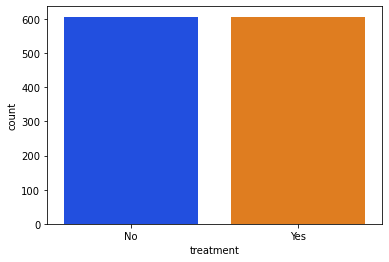

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
dataframe = pd.read_csv("main_survey.csv")

print("Comparison of the answers for Treatment")
ax = sns.set_palette("bright")
ax = sns.countplot(x="treatment",data=dataframe)


## Secondly, I will explore the answers from the question: If you have a mental health condition, do you feel that it interferes with your work?

In [32]:
main_df.groupby("work_interfere")[list(main_df.columns[:])[1]].count()

work_interfere
Never        449
Often        152
Rarely       166
Sometimes    446
Name: Gender, dtype: int64

Comparison of the answers for Work Interference


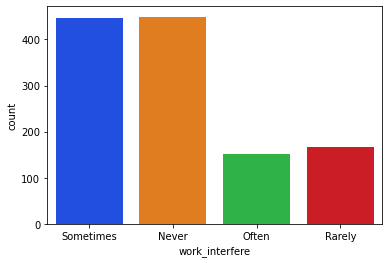

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
dataframe = pd.read_csv("main_survey.csv")

print("Comparison of the answers for Work Interference")
ax = sns.set_palette("bright")
ax = sns.countplot(x='work_interfere',data=dataframe)


## My reoccuring theme for this journey is the examine the treatment and how it correlates with the different questions in the survey...
### For this graph, you will see the comparison of Treatment and Work Interference...

Treatment vs. Work Interference


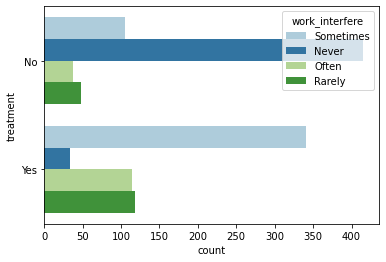

In [24]:
print("Treatment vs. Work Interference")
ax = sns.set_palette("Paired")
ax = sns.countplot(y='treatment',hue='work_interfere',data=dataframe)


### For the next graph, I want to show the how working remotely can hinder your mental health...

In [33]:
main_df.groupby("remote_work")[list(main_df.columns[:])[1]].count()

remote_work
No     853
Yes    360
Name: Gender, dtype: int64

Remote Work vs. Work Interference


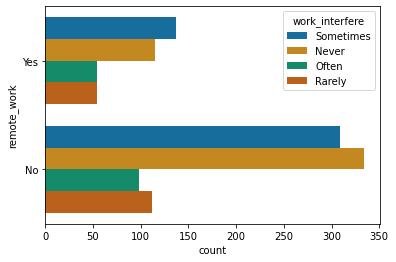

In [26]:
print('Remote Work vs. Work Interference')
ax = sns.set_palette("colorblind")
ax = sns.countplot(y='remote_work', hue = "work_interfere", data=dataframe)


### This graph shows the correlation between gender and treatment. As you observe, I want you to see that more females are open to treatment when asked and with males, more of them say no...

In [34]:
main_df.groupby("Gender")[list(main_df.columns[:])[1]].count()

Gender
Female    241
Male      972
Name: Gender, dtype: int64

Treatment vs. Gender


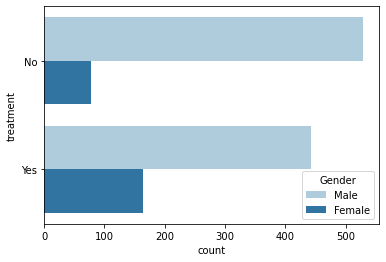

In [28]:
print("Treatment vs. Gender")
ax = sns.set_palette("Paired")
ax = sns.countplot(y='treatment', hue = "Gender", data=dataframe)


### For my last graph, I want to show the importance of knowing that it's okay to go on leave for any mental health condition. Most people don't know if they are allowed and the employers should make it known... 

In [35]:
main_df.groupby("leave")[list(main_df.columns[:])[1]].count()

leave
Don't know            545
Somewhat difficult    114
Somewhat easy         259
Very difficult         94
Very easy             201
Name: Gender, dtype: int64

Treatment vs. Leave


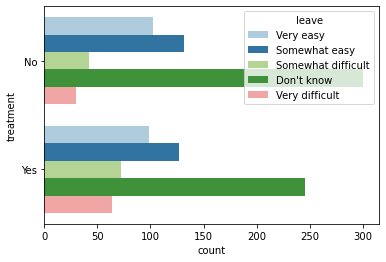

In [30]:
print("Treatment vs. Leave")
ax = sns.set_palette("Paired")
ax = sns.countplot(y='treatment', hue = "leave", data=dataframe)


### This project is exploratory and I want the reader to see for themselves the data given 